In [1]:
import numpy as np, pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
np.random.seed(42)


In [2]:
iris = load_iris(as_frame=True)
X = iris.data
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_scaled)
X2[:3]


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

Silhouette (KMeans): 0.5091683341538229


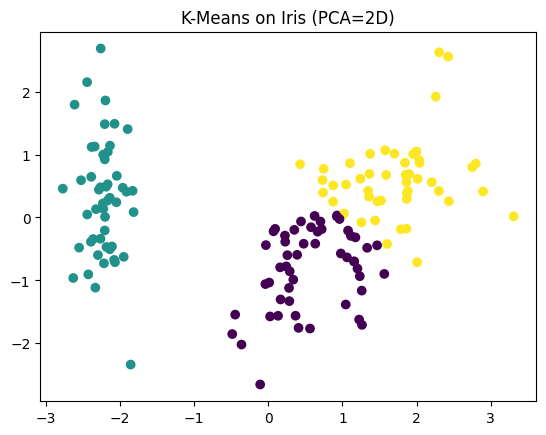

In [3]:
km = KMeans(n_clusters=3, n_init=20, random_state=42)
labels_km = km.fit_predict(X2)
sil_km = silhouette_score(X2, labels_km)
print("Silhouette (KMeans):", sil_km)
plt.scatter(X2[:,0], X2[:,1], c=labels_km)
plt.title("K-Means on Iris (PCA=2D)")
plt.show()


Silhouette (DBSCAN, excluding noise): 0.6395992611130253


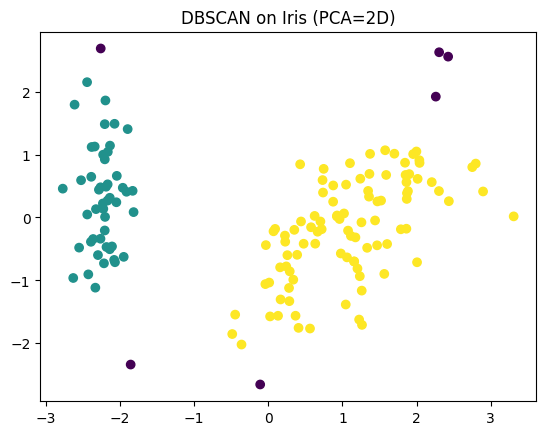

In [4]:
db = DBSCAN(eps=0.6, min_samples=5).fit(X2)
labels_db = db.labels_
mask_noise = labels_db == -1
sil_db = silhouette_score(X2[~mask_noise], labels_db[~mask_noise]) if (~mask_noise).sum()>1 and len(set(labels_db[~mask_noise]))>1 else "N/A"
print("Silhouette (DBSCAN, excluding noise):", sil_db)
plt.scatter(X2[:,0], X2[:,1], c=labels_db)
plt.title("DBSCAN on Iris (PCA=2D)")
plt.show()
